In [49]:
from aiGame import HighLevelAIGame, AIGame
from game import Game
from tqdm.auto import trange
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# copied from RL hw starter code
def plot_curves(arr_list, legend_list, color_list, ylabel, fig_title):
    """
    Args:
        arr_list (list): list of results arrays to plot
        legend_list (list): list of legends corresponding to each result array
        color_list (list): list of color corresponding to each result array
        ylabel (string): label of the Y axis

        Note that, make sure the elements in the arr_list, legend_list and color_list are associated with each other correctly.
        Do not forget to change the ylabel for different plots.
    """
    # set the figure type
    fig, ax = plt.subplots(figsize=(12, 8))

    # PLEASE NOTE: Change the labels for different plots
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Time Steps")

    # ploth results
    h_list = []
    for arr, legend, color in zip(arr_list, legend_list, color_list):
        # compute the standard error
        arr_err = arr.std(axis=0) / np.sqrt(arr.shape[0])
        # plot the mean
        h, = ax.plot(range(arr.shape[1]), arr.mean(axis=0), color=color, label=legend)
        # plot the confidence band
        arr_err *= 1.96
        ax.fill_between(range(arr.shape[1]), arr.mean(axis=0) - arr_err, arr.mean(axis=0) + arr_err, alpha=0.3,
                        color=color)
        # save the plot handle
        h_list.append(h)

    # plot legends
    ax.set_title(f"{fig_title}")
    ax.legend(handles=h_list)

    plt.show()

In [5]:
def runExperiment(initialState: 'AIGame', chooseAction, numTimesteps=100, numGames=10):
    """Run a game with the given policy,
    cut off after numTimesteps time steps.
    Run numGames games.
    Return list of list of states (each game's history)"""
    statess = []
    for game in trange(numGames, desc="games loop"):
        state = initialState.copy()
        states = [state.copy()]
        for t in trange(numTimesteps, desc=f'game {game}'):
            if state.isDead():
                break
            action = chooseAction(state)
            state = state.move(action)
            states.append(state)
        statess.append(states)
    return statess

In [6]:
from montecarlo import *
state = HighLevelAIGame(Game())
mcts = ScoreEvalMCTS()
numIterations = 150
def chooseAction(state):
    return mcts.chooseAction(state, numIterations=numIterations)
scoreEvalMCTSResults = runExperiment(state, chooseAction, numGames=10)

games loop:   0%|          | 0/10 [00:00<?, ?it/s]

game 0:   0%|          | 0/100 [00:00<?, ?it/s]

game 1:   0%|          | 0/100 [00:00<?, ?it/s]

game 2:   0%|          | 0/100 [00:00<?, ?it/s]

game 3:   0%|          | 0/100 [00:00<?, ?it/s]

game 4:   0%|          | 0/100 [00:00<?, ?it/s]

game 5:   0%|          | 0/100 [00:00<?, ?it/s]

game 6:   0%|          | 0/100 [00:00<?, ?it/s]

game 7:   0%|          | 0/100 [00:00<?, ?it/s]

game 8:   0%|          | 0/100 [00:00<?, ?it/s]

game 9:   0%|          | 0/100 [00:00<?, ?it/s]

In [7]:
from montecarlo import *
state = HighLevelAIGame(Game())
mcts = HeuristicEvalMCTS()
numIterations = 150
def chooseAction(state):
    return mcts.chooseAction(state, numIterations=numIterations)
heuristicEvalMCTSResults = runExperiment(state, chooseAction, numGames=10)

games loop:   0%|          | 0/10 [00:00<?, ?it/s]

game 0:   0%|          | 0/100 [00:00<?, ?it/s]

game 1:   0%|          | 0/100 [00:00<?, ?it/s]

game 2:   0%|          | 0/100 [00:00<?, ?it/s]

game 3:   0%|          | 0/100 [00:00<?, ?it/s]

game 4:   0%|          | 0/100 [00:00<?, ?it/s]

game 5:   0%|          | 0/100 [00:00<?, ?it/s]

game 6:   0%|          | 0/100 [00:00<?, ?it/s]

game 7:   0%|          | 0/100 [00:00<?, ?it/s]

game 8:   0%|          | 0/100 [00:00<?, ?it/s]

game 9:   0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
from montecarlo import *
state = HighLevelAIGame(Game())
maxRolloutLength = 20
mcts = MCTS(uniformPolicy, maxRolloutLength=maxRolloutLength)
numIterations = 150
def chooseAction(state):
    return mcts.chooseAction(state, numIterations=numIterations)
uniformRolloutMCTSResults = runExperiment(state, chooseAction, numGames=10)

games loop:   0%|          | 0/10 [00:00<?, ?it/s]

game 0:   0%|          | 0/100 [00:00<?, ?it/s]

game 1:   0%|          | 0/100 [00:00<?, ?it/s]

game 2:   0%|          | 0/100 [00:00<?, ?it/s]

game 3:   0%|          | 0/100 [00:00<?, ?it/s]

game 4:   0%|          | 0/100 [00:00<?, ?it/s]

game 5:   0%|          | 0/100 [00:00<?, ?it/s]

game 6:   0%|          | 0/100 [00:00<?, ?it/s]

game 7:   0%|          | 0/100 [00:00<?, ?it/s]

game 8:   0%|          | 0/100 [00:00<?, ?it/s]

game 9:   0%|          | 0/100 [00:00<?, ?it/s]

In [27]:
from montecarlo import *
state = HighLevelAIGame(Game())
maxRolloutLength = 4
mcts = MCTS(greedyHeuristicPolicy, maxRolloutLength=maxRolloutLength)
numIterations = 75
def chooseAction(state):
    return mcts.chooseAction(state, numIterations=numIterations)
greedyHeuristicRolloutMCTSResults = runExperiment(state, chooseAction, numGames=5)

# too slow

games loop:   0%|          | 0/5 [00:00<?, ?it/s]

game 0:   0%|          | 0/100 [00:00<?, ?it/s]

game 1:   0%|          | 0/100 [00:00<?, ?it/s]

game 2:   0%|          | 0/100 [00:00<?, ?it/s]

game 3:   0%|          | 0/100 [00:00<?, ?it/s]

game 4:   0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
import minimax
state = HighLevelAIGame(Game())
def chooseAction(state):
    return minimax.chooseAction(state, maxDepth=0)
minimax0Results = runExperiment(state, chooseAction, numGames=10)

games loop:   0%|          | 0/10 [00:00<?, ?it/s]

game 0:   0%|          | 0/100 [00:00<?, ?it/s]

game 1:   0%|          | 0/100 [00:00<?, ?it/s]

game 2:   0%|          | 0/100 [00:00<?, ?it/s]

game 3:   0%|          | 0/100 [00:00<?, ?it/s]

game 4:   0%|          | 0/100 [00:00<?, ?it/s]

game 5:   0%|          | 0/100 [00:00<?, ?it/s]

game 6:   0%|          | 0/100 [00:00<?, ?it/s]

game 7:   0%|          | 0/100 [00:00<?, ?it/s]

game 8:   0%|          | 0/100 [00:00<?, ?it/s]

game 9:   0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
state = HighLevelAIGame(Game())
def chooseAction(state):
    return minimax.chooseAction(state, maxDepth=1)
minimax1Results = runExperiment(state, chooseAction, numGames=10)

games loop:   0%|          | 0/10 [00:00<?, ?it/s]

game 0:   0%|          | 0/100 [00:00<?, ?it/s]

game 1:   0%|          | 0/100 [00:00<?, ?it/s]

game 2:   0%|          | 0/100 [00:00<?, ?it/s]

game 3:   0%|          | 0/100 [00:00<?, ?it/s]

game 4:   0%|          | 0/100 [00:00<?, ?it/s]

game 5:   0%|          | 0/100 [00:00<?, ?it/s]

game 6:   0%|          | 0/100 [00:00<?, ?it/s]

game 7:   0%|          | 0/100 [00:00<?, ?it/s]

game 8:   0%|          | 0/100 [00:00<?, ?it/s]

game 9:   0%|          | 0/100 [00:00<?, ?it/s]

In [12]:
state = HighLevelAIGame(Game())
def chooseAction(state):
    return random.choice(state.getLegalActions())
randomResults = runExperiment(state, chooseAction, numGames=10)

games loop:   0%|          | 0/10 [00:00<?, ?it/s]

game 0:   0%|          | 0/100 [00:00<?, ?it/s]

game 1:   0%|          | 0/100 [00:00<?, ?it/s]

game 2:   0%|          | 0/100 [00:00<?, ?it/s]

game 3:   0%|          | 0/100 [00:00<?, ?it/s]

game 4:   0%|          | 0/100 [00:00<?, ?it/s]

game 5:   0%|          | 0/100 [00:00<?, ?it/s]

game 6:   0%|          | 0/100 [00:00<?, ?it/s]

game 7:   0%|          | 0/100 [00:00<?, ?it/s]

game 8:   0%|          | 0/100 [00:00<?, ?it/s]

game 9:   0%|          | 0/100 [00:00<?, ?it/s]

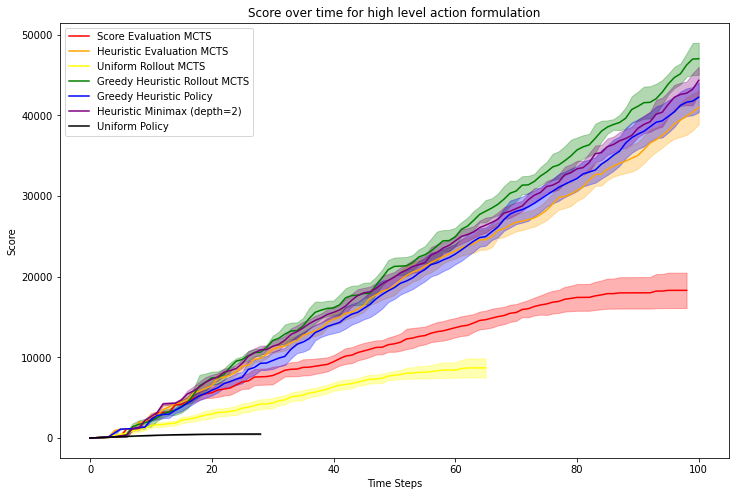

In [28]:
def scores(results):
    results = rectangularize(results)
    return np.array([[state.score() for state in states] for states in results])

def rectangularize(lol):
    """takes in a list of lists and pads short lists with its last element until they're all equal length"""
    lengths = [len(l) for l in lol]
    max_length = max(lengths)
    padded = [l + [l[-1]]*(max_length - len(l)) for l in lol]
    return padded

plot_curves([scores(scoreEvalMCTSResults),
             scores(heuristicEvalMCTSResults),
             scores(uniformRolloutMCTSResults),
             scores(greedyHeuristicRolloutMCTSResults),
             scores(minimax0Results),
             scores(minimax1Results),
             scores(randomResults)],
            ["Score Evaluation MCTS",
             "Heuristic Evaluation MCTS",
             "Uniform Rollout MCTS",
             "Greedy Heuristic Rollout MCTS",
             "Greedy Heuristic Policy",
             "Heuristic Minimax (depth=2)",
             "Uniform Policy"],
            ["red",
             "orange",
             "yellow",
             "green",
             "blue",
             "purple",
             "black"],
            "Score",
            "Score over time for high level action formulation")

In [45]:
def runLowLevelExperiment(initialState: 'AIGame', chooseAction, numPieces=100, maxNumTimesteps=1000,numGames=10):
    """Run a game with the given policy,
    cut off after numTimesteps time steps.
    Run numGames games.
    Return list of list of states (each game's history)"""
    statess = []
    for game in trange(numGames, desc="games loop"):
        state = initialState.copy()
        states = [state.copy()]
        pieceCount = 0
        bag = state.game.bag[:]
        for t in trange(maxNumTimesteps, desc=f'game {game}'):
            if state.isDead() or pieceCount >= numPieces:
                break
            action = chooseAction(state)
            state = state.move(action)
            if bag != state.game.bag:
                # bag change => piece was placed
                pieceCount += 1
                bag = state.game.bag[:]
                states.append(state)
        statess.append(states)
    return statess

In [37]:
state = AIGame(Game())
def chooseAction(state):
    return random.choice(state.getLegalActions())
randomLowLevelResults = runLowLevelExperiment(state, chooseAction, numGames=10)

games loop:   0%|          | 0/10 [00:00<?, ?it/s]

game 0:   0%|          | 0/1000 [00:00<?, ?it/s]

game 1:   0%|          | 0/1000 [00:00<?, ?it/s]

game 2:   0%|          | 0/1000 [00:00<?, ?it/s]

game 3:   0%|          | 0/1000 [00:00<?, ?it/s]

game 4:   0%|          | 0/1000 [00:00<?, ?it/s]

game 5:   0%|          | 0/1000 [00:00<?, ?it/s]

game 6:   0%|          | 0/1000 [00:00<?, ?it/s]

game 7:   0%|          | 0/1000 [00:00<?, ?it/s]

game 8:   0%|          | 0/1000 [00:00<?, ?it/s]

game 9:   0%|          | 0/1000 [00:00<?, ?it/s]

In [60]:
from montecarlo import *
state = AIGame(Game())
mcts = ScoreEvalMCTS()
numIterations = 150
def chooseAction(state):
    return mcts.chooseAction(state, numIterations=numIterations)
scoreEvalMCTSLowLevelResults = runLowLevelExperiment(state, chooseAction, numGames=10)

games loop:   0%|          | 0/10 [00:00<?, ?it/s]

game 0:   0%|          | 0/1000 [00:00<?, ?it/s]

game 1:   0%|          | 0/1000 [00:00<?, ?it/s]

game 2:   0%|          | 0/1000 [00:00<?, ?it/s]

game 3:   0%|          | 0/1000 [00:00<?, ?it/s]

game 4:   0%|          | 0/1000 [00:00<?, ?it/s]

game 5:   0%|          | 0/1000 [00:00<?, ?it/s]

game 6:   0%|          | 0/1000 [00:00<?, ?it/s]

game 7:   0%|          | 0/1000 [00:00<?, ?it/s]

game 8:   0%|          | 0/1000 [00:00<?, ?it/s]

game 9:   0%|          | 0/1000 [00:00<?, ?it/s]

In [61]:
from montecarlo import *
state = AIGame(Game())
mcts = HeuristicEvalMCTS()
numIterations = 150
def chooseAction(state):
    return mcts.chooseAction(state, numIterations=numIterations)
heuristicEvalMCTSLowLevelResults = runLowLevelExperiment(state, chooseAction, numGames=10)

games loop:   0%|          | 0/10 [00:00<?, ?it/s]

game 0:   0%|          | 0/1000 [00:00<?, ?it/s]

game 1:   0%|          | 0/1000 [00:00<?, ?it/s]

game 2:   0%|          | 0/1000 [00:00<?, ?it/s]

game 3:   0%|          | 0/1000 [00:00<?, ?it/s]

game 4:   0%|          | 0/1000 [00:00<?, ?it/s]

game 5:   0%|          | 0/1000 [00:00<?, ?it/s]

game 6:   0%|          | 0/1000 [00:00<?, ?it/s]

game 7:   0%|          | 0/1000 [00:00<?, ?it/s]

game 8:   0%|          | 0/1000 [00:00<?, ?it/s]

game 9:   0%|          | 0/1000 [00:00<?, ?it/s]

In [63]:
from montecarlo import *
state = AIGame(Game())
maxRolloutLength = 20
mcts = MCTS(uniformPolicy, maxRolloutLength=maxRolloutLength)
numIterations = 150
def chooseAction(state):
    return mcts.chooseAction(state, numIterations=numIterations)
uniformRolloutMCTSLowLevelResults = runLowLevelExperiment(state, chooseAction, numGames=10)

games loop:   0%|          | 0/10 [00:00<?, ?it/s]

game 0:   0%|          | 0/1000 [00:00<?, ?it/s]

game 1:   0%|          | 0/1000 [00:00<?, ?it/s]

game 2:   0%|          | 0/1000 [00:00<?, ?it/s]

game 3:   0%|          | 0/1000 [00:00<?, ?it/s]

game 4:   0%|          | 0/1000 [00:00<?, ?it/s]

game 5:   0%|          | 0/1000 [00:00<?, ?it/s]

game 6:   0%|          | 0/1000 [00:00<?, ?it/s]

game 7:   0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [64]:
from montecarlo import *
state = AIGame(Game())
maxRolloutLength = 4
mcts = MCTS(greedyHeuristicPolicy, maxRolloutLength=maxRolloutLength)
numIterations = 75
def chooseAction(state):
    return mcts.chooseAction(state, numIterations=numIterations)
greedyHeuristicRolloutLowLevelMCTSResults = runLowLevelExperiment(state, chooseAction, numGames=5)

games loop:   0%|          | 0/5 [00:00<?, ?it/s]

game 0:   0%|          | 0/1000 [00:00<?, ?it/s]

game 1:   0%|          | 0/1000 [00:00<?, ?it/s]

game 2:   0%|          | 0/1000 [00:00<?, ?it/s]

game 3:   0%|          | 0/1000 [00:00<?, ?it/s]

game 4:   0%|          | 0/1000 [00:00<?, ?it/s]

In [65]:
import minimax
state = AIGame(Game())
def chooseAction(state):
    return minimax.chooseAction(state, maxDepth=0)
minimax0LowLevelResults = runLowLevelExperiment(state, chooseAction, numGames=10)

games loop:   0%|          | 0/10 [00:00<?, ?it/s]

game 0:   0%|          | 0/1000 [00:00<?, ?it/s]

game 1:   0%|          | 0/1000 [00:00<?, ?it/s]

game 2:   0%|          | 0/1000 [00:00<?, ?it/s]

game 3:   0%|          | 0/1000 [00:00<?, ?it/s]

game 4:   0%|          | 0/1000 [00:00<?, ?it/s]

game 5:   0%|          | 0/1000 [00:00<?, ?it/s]

game 6:   0%|          | 0/1000 [00:00<?, ?it/s]

game 7:   0%|          | 0/1000 [00:00<?, ?it/s]

game 8:   0%|          | 0/1000 [00:00<?, ?it/s]

game 9:   0%|          | 0/1000 [00:00<?, ?it/s]

In [66]:
state = AIGame(Game())
def chooseAction(state):
    return minimax.chooseAction(state, maxDepth=1)
minimax1LowLevelResults = runLowLevelExperiment(state, chooseAction, numGames=10)

games loop:   0%|          | 0/10 [00:00<?, ?it/s]

game 0:   0%|          | 0/1000 [00:00<?, ?it/s]

game 1:   0%|          | 0/1000 [00:00<?, ?it/s]

game 2:   0%|          | 0/1000 [00:00<?, ?it/s]

game 3:   0%|          | 0/1000 [00:00<?, ?it/s]

game 4:   0%|          | 0/1000 [00:00<?, ?it/s]

game 5:   0%|          | 0/1000 [00:00<?, ?it/s]

game 6:   0%|          | 0/1000 [00:00<?, ?it/s]

game 7:   0%|          | 0/1000 [00:00<?, ?it/s]

game 8:   0%|          | 0/1000 [00:00<?, ?it/s]

game 9:   0%|          | 0/1000 [00:00<?, ?it/s]

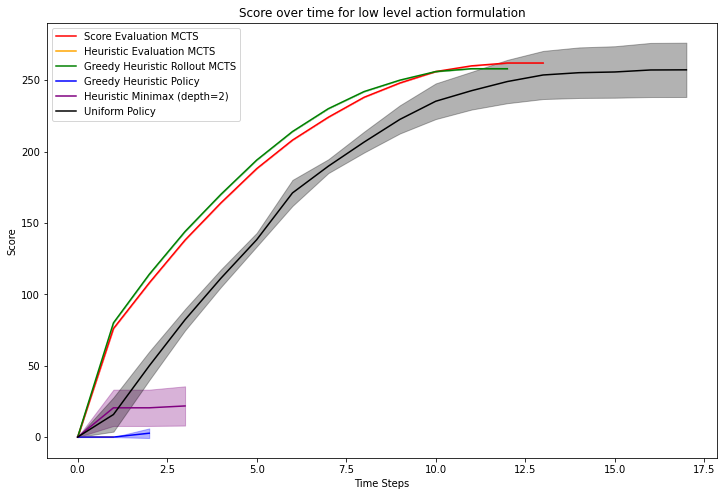

In [68]:
plot_curves([scores(scoreEvalMCTSLowLevelResults),
             scores(heuristicEvalMCTSLowLevelResults),
             # scores(uniformRolloutMCTSLowLevelResults),
             scores(greedyHeuristicRolloutLowLevelMCTSResults),
             scores(minimax0LowLevelResults),
             scores(minimax1LowLevelResults),
             scores(randomLowLevelResults)],
            ["Score Evaluation MCTS",
             "Heuristic Evaluation MCTS",
             # "Uniform Rollout MCTS",
             "Greedy Heuristic Rollout MCTS",
             "Greedy Heuristic Policy",
             "Heuristic Minimax (depth=2)",
             "Uniform Policy"],
            ["red",
             "orange",
             # "yellow",
             "green",
             "blue",
             "purple",
             "black"],
            "Score",
            "Score over time for low level action formulation")